In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
df = pd.read_pickle('new_withCNN_withRF_withMLP.pkl')

In [5]:
df.head()

,ak7pfcand_charge,ak7pfcand_eta,ak7pfcand_id,ak7pfcand_ijet,ak7pfcand_phi,ak7pfcand_pt,charHad_filter,electron_filter,event,jet_E_ak7,...,prediction_rfpteta,pthat,residual,residual_MLP,residual_rfall,residual_rfpteta,rho,run,sq_diff,sumet
26052,"[-1, 1, 0, 1, -1, 1, -1, -1, -1, 1, 0, 0, 0, 1...","[-0.247395724058, -0.25636023283, -0.187874004...","[211, 211, 22, 211, 211, 211, 211, 211, 211, 2...",0,"[0.82744795084, 0.843998134136, 0.630532920361...","[23.2622776031, 19.9574584961, 18.5029182434, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",3607596,132.403187,...,0.978876,128.335083,-0.003953,-0.005961,NaN,NaN,4.299569,1,0.000036,1059.910522
35907,"[-1, 1, 1, 1, 0, 1, -1, 0, -1, -1, -1, 1, -1, ...","[-1.23478043079, -1.22814083099, -1.2339054346...","[211, 211, 211, 211, 22, 211, 211, 22, 211, 21...",0,"[-2.16391587257, -2.2245619297, -2.17128157616...","[22.7767601013, 14.1007213593, 13.5406017303, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4501540,253.338658,...,0.997817,140.615036,0.027926,0.002949,NaN,NaN,7.606858,1,0.000009,936.791748
9549,"[0, -1, 1, -1, 0, -1, -1, 1, -1, 1, 1, -1, -1,...","[0.993775784969, 0.986693918705, 0.99138373136...","[22, 211, 211, 211, 22, 211, 211, 211, 211, 21...",0,"[1.03682720661, 1.04613566399, 1.07275879383, ...","[63.100605011, 15.2158679962, 12.5081129074, 9...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",2154532,253.612339,...,1.025030,133.641281,0.034280,0.006030,0.005005,0.028867,7.952587,1,0.000036,410.924408
811,"[0, -1, 1, 1, 1, -1, -1, -1, 0, 0, 0, 0, 1, 0,...","[0.784304738045, 0.913035392761, 0.76391005516...","[22, 211, 211, 211, 211, 211, 211, 211, 130, 2...",0,"[-0.388076722622, -0.408272385597, -0.41381072...","[60.2751655579, 54.2958526611, 50.1740074158, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",5767,402.867056,...,1.015914,322.697632,0.025664,0.015971,NaN,NaN,8.686143,1,0.000255,1413.669556
57404,"[0, 0, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 0, 1...","[0.489281564951, 0.512436449528, 0.51207470893...","[22, 22, 211, 211, 211, 211, 211, 211, 211, 21...",1,"[-1.88567638397, -1.77796721458, -1.8044520616...","[27.6389045715, 19.5199165344, 11.3646688461, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",5603967,139.117310,...,0.968363,157.448776,-0.034459,-0.016752,0.005357,-0.009067,5.788191,1,0.000281,944.815918


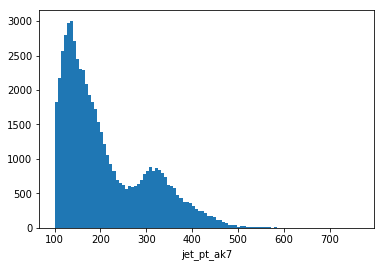

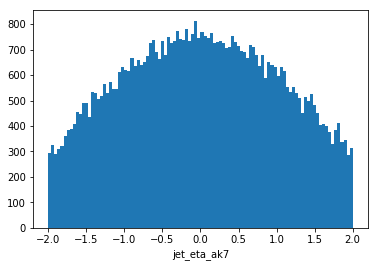

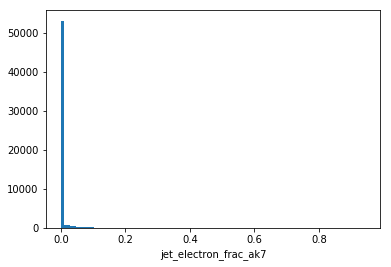

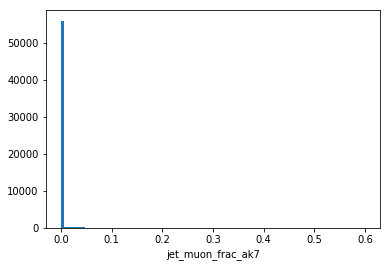

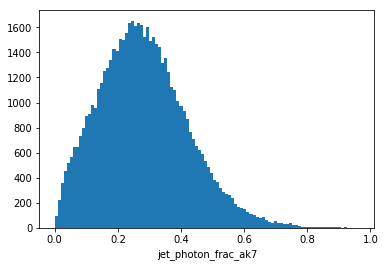

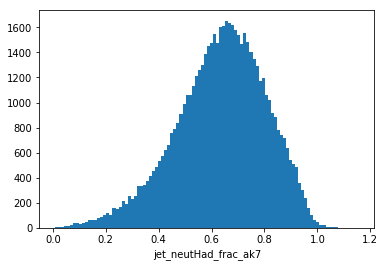

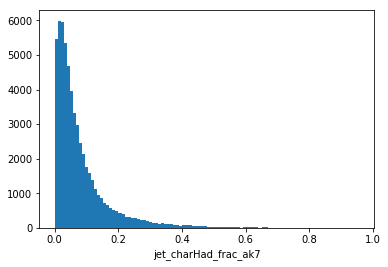

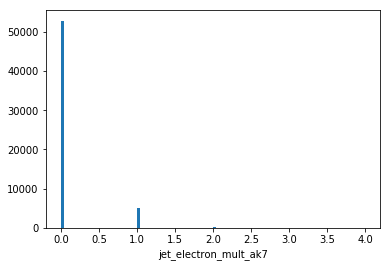

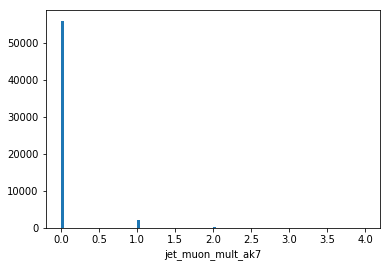

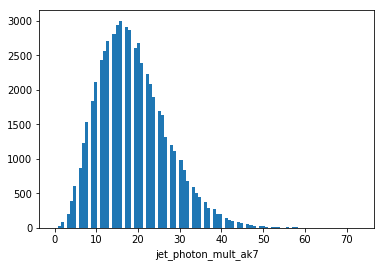

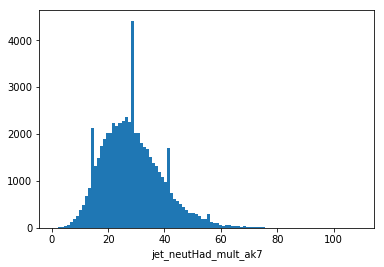

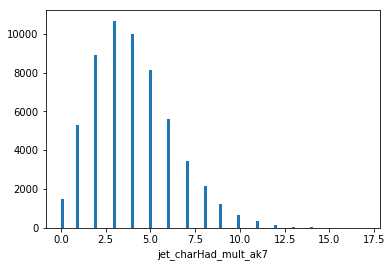

In [6]:
plot_vars=['jet_pt_ak7','jet_eta_ak7','jet_electron_frac_ak7','jet_muon_frac_ak7','jet_photon_frac_ak7','jet_neutHad_frac_ak7','jet_charHad_frac_ak7','jet_electron_mult_ak7','jet_muon_mult_ak7','jet_photon_mult_ak7','jet_neutHad_mult_ak7','jet_charHad_mult_ak7']
for v in plot_vars : 
    plt.hist(df[v],bins=100)
    plt.xlabel(v)
    #plt.yscale('log')
    plt.show()


In [48]:
def jes_profile(indep_var,dep_var,c,low_bin,high_bin,nbins):
    print "plot_var:",indep_var
    print "low_bin:",low_bin
    print "high_bin:",high_bin
    print "nbins:",nbins
    df[indep_var+'_bins'] = pd.cut(df[indep_var],np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins)),labels=range(nbins))
    means = df.groupby([indep_var+'_bins']).mean()[dep_var].values
    counts = df.groupby([indep_var+'_bins']).count()[dep_var].values
    sqrt_counts = map(np.sqrt,counts)
    errs  = df.groupby([indep_var+'_bins']).std()[dep_var].values
    errs = errs/sqrt_counts
    bin_center=np.arange(low_bin,high_bin+0.00001,(high_bin-low_bin)/float(nbins))
    bin_center = bin_center[:-1]
    bin_center = map(lambda x : x+(high_bin-low_bin)/float(nbins)/2.,bin_center)
    plt.errorbar(x=bin_center,y=means,yerr=errs,fmt='o',color=c)
    plt.xlabel(indep_var)
    plt.ylabel("<residual>")
    plt.ylim(0.8,1.1)

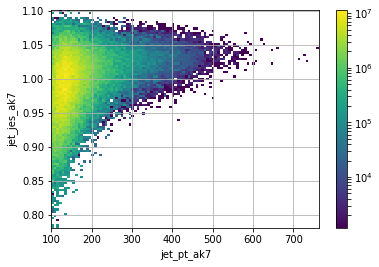

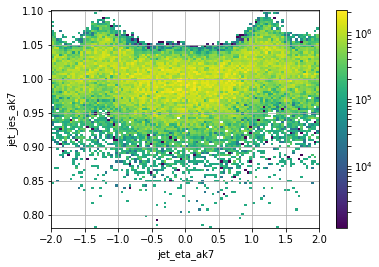

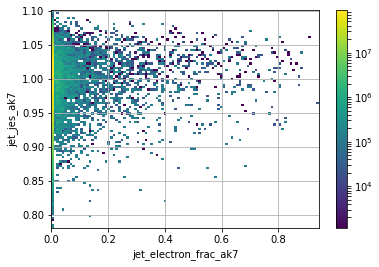

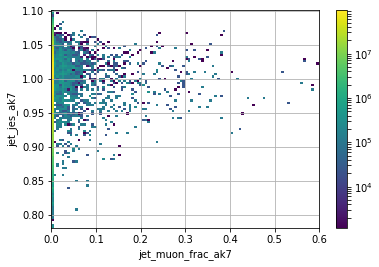

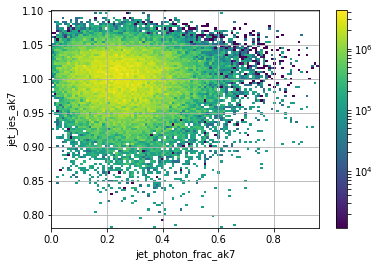

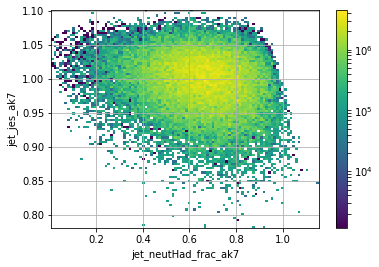

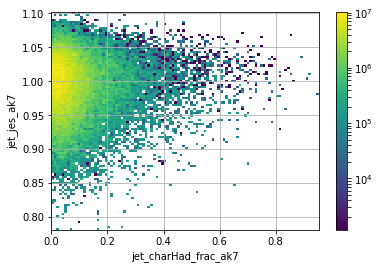

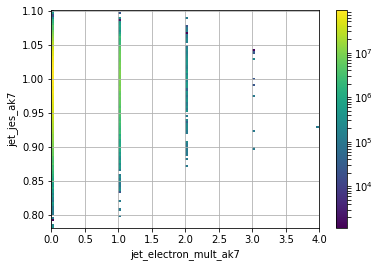

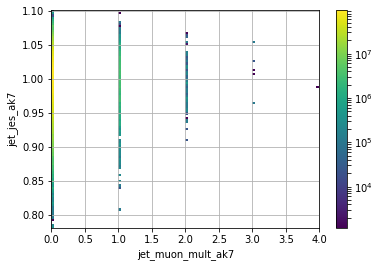

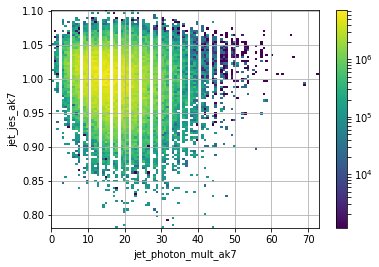

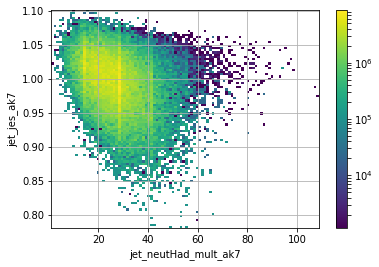

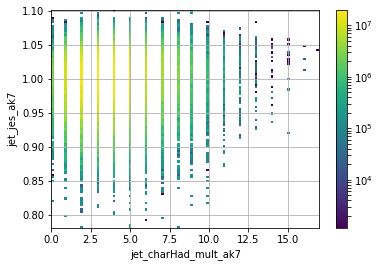

In [33]:
var_binning = [(100,1000,90),(-3,3,60),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,1.5,50),(0,100,100),(0,100,100),(0,100,100),(0,100,100),(0,100,100)]
for f,b in zip(plot_vars,var_binning) : 
    plt.hist2d(df[f],df['jet_jes_ak7'],weights=df['mcweight'],bins=100,norm=LogNorm())
    plt.ylabel('jet_jes_ak7')
    plt.grid()
    plt.colorbar()
    plt.xlabel(f)
    plt.show()

plot_var: jet_pt_ak7
low_bin: 100
high_bin: 1000
nbins: 90


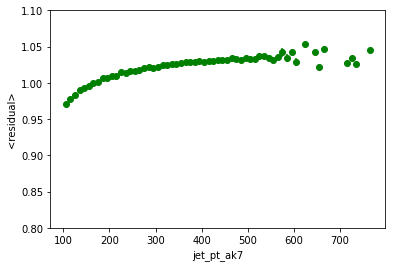

plot_var: jet_eta_ak7
low_bin: -3
high_bin: 3
nbins: 60


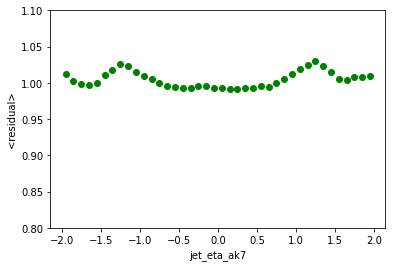

plot_var: jet_electron_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


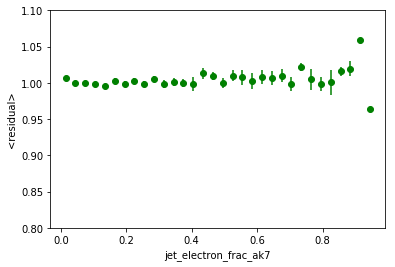

plot_var: jet_muon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


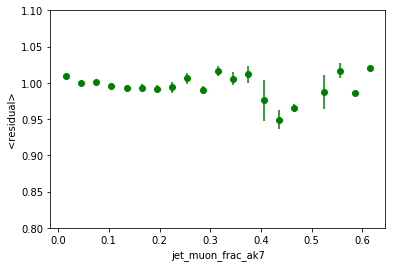

plot_var: jet_photon_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


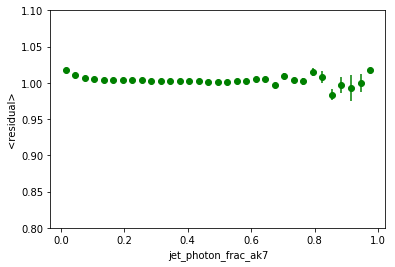

plot_var: jet_neutHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


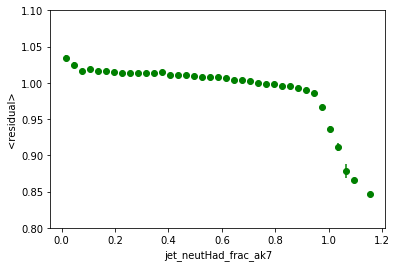

plot_var: jet_charHad_frac_ak7
low_bin: 0
high_bin: 1.5
nbins: 50


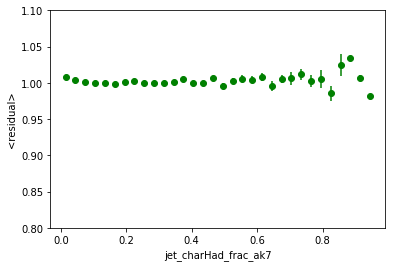

plot_var: jet_electron_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


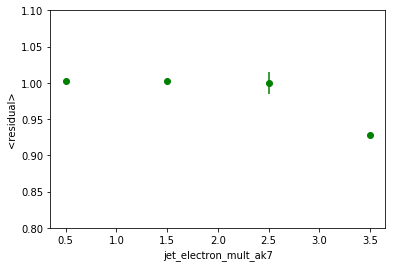

plot_var: jet_muon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


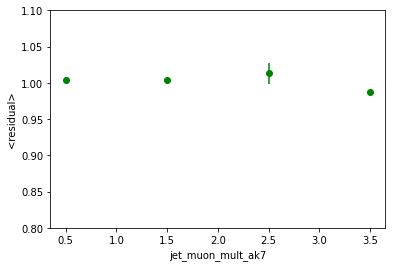

plot_var: jet_photon_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


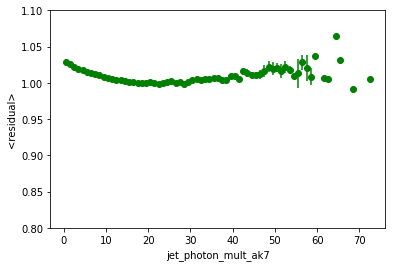

plot_var: jet_neutHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


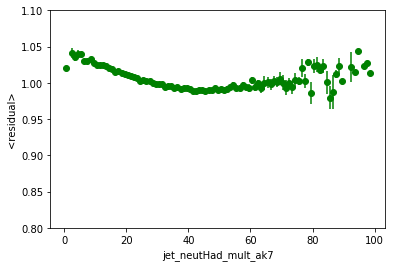

plot_var: jet_charHad_mult_ak7
low_bin: 0
high_bin: 100
nbins: 100


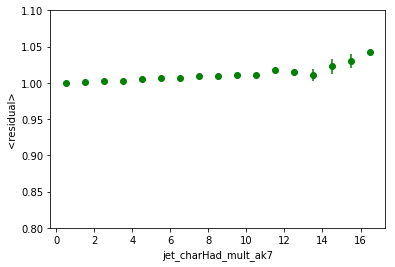

In [49]:
for f,b in zip(plot_vars,var_binning) : 
    jes_profile(f,'jet_jes_ak7','g',*b)
    plt.show()

In [78]:
df['jet_px_ak7'] = map(np.cos,df['jet_phi_ak7'])*df['jet_pt_ak7']
df['jet_py_ak7'] = map(np.sin,df['jet_phi_ak7'])*df['jet_pt_ak7']
df['jet_px_ak7_truth'] = map(np.cos,df['jet_phi_ak7'])*df['jet_pt_ak7']/df['jet_jes_ak7']
df['jet_py_ak7_truth'] = map(np.sin,df['jet_phi_ak7'])*df['jet_pt_ak7']/df['jet_jes_ak7']
df_evt = df.groupby(['run','lumi','event']).sum()
df_evt['mht'] = map(np.sqrt,np.multiply(df_evt['jet_px_ak7'],df_evt['jet_px_ak7'])+np.multiply(df_evt['jet_py_ak7'],df_evt['jet_py_ak7']))
df_evt['mht_truth'] = map(np.sqrt,np.multiply(df_evt['jet_px_ak7_truth'],df_evt['jet_px_ak7_truth'])+np.multiply(df_evt['jet_py_ak7_truth'],df_evt['jet_py_ak7_truth']))

df_evt.head()

ak7pfcand_ijet    jet_E_ak7  jet_area_ak7  \
run lumi event                                              
1   12   2828                6  1856.826490      5.814440   
         2829                1  1241.153500      3.041860   
         2830                1  1475.430597      3.051833   
         2831                1  1328.638695      3.111673   
         2832                1  1374.643810      3.091726   

                jet_charHad_frac_ak7  jet_charHad_frac_ak7_log  \
run lumi event                                                   
1   12   2828               0.541984                -11.372362   
         2829               0.121545                 -5.444152   
         2830               0.038647                 -7.557983   
         2831               0.065009                 -7.244018   
         2832               0.056866                 -7.437372   

                jet_charHad_frac_ak7_log_scaled  jet_charHad_mult_ak7  \
run lumi event                                                          
1   12   2828                          0.234749                    13   
         2829                          0.363610                     5   
         2830                         -1.786955                     9   
         2831                         -1.467534                     8   
         2832                         -1.664249                     7   

                jet_charHad_mult_ak7_scaled  jet_electron_frac_ak7  \
run lumi event                                                       
1   12   2828                     -1.395245               0.014132   
         2829                     -1.354817               0.002750   
         2830                      0.397702               0.000000   
         2831                     -0.040428               0.000000   
         2832                     -0.478557               0.000000   

                jet_electron_frac_ak7_scaled     ...      residual_rfpteta  \
run lumi event                                   ...                         
1   12   2828                      -0.462758     ...             -0.000582   
         2829                      -0.310177     ...             -0.006138   
         2830                      -0.360372     ...              0.012854   
         2831                      -0.360372     ...             -0.055206   
         2832                      -0.360372     ...              0.043860   

                      rho   sq_diff        sumet  jet_px_ak7  jet_py_ak7  \
run lumi event                                                             
1   12   2828   19.415068  0.000098     0.000000   11.611766    9.922229   
         2829   10.697829  0.001437  2666.570557   47.624590    2.718612   
         2830   15.356420  0.000440  2283.447021  -99.243834 -124.150757   
         2831    6.122605  0.000154  2468.172119   -0.472722  -37.741156   
         2832   33.899586  0.000854  1777.688965  -73.211761   39.685103   

                jet_px_ak7_truth  jet_py_ak7_truth         mht   mht_truth  
run lumi event                                                              
1   12   2828          -2.711797         16.471795   15.273629   16.693528  
         2829          46.470374         10.247921   47.702122   47.586927  
         2830         -91.572512       -115.008820  158.942597  147.012087  
         2831          -6.720659        -31.674918   37.744116   32.380051  
         2832         -69.273191         35.457838   83.275864   77.820520  

[5 rows x 56 columns]

In [79]:
df_evt_mean = df.groupby(['run','lumi','event']).mean()

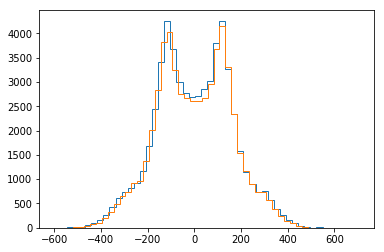

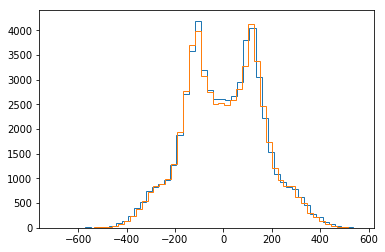

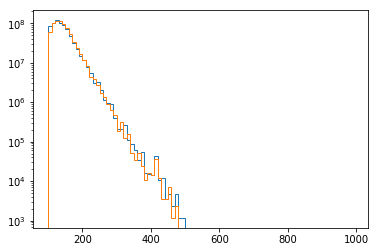

In [80]:
plt.hist(df['jet_px_ak7'],bins=50,histtype='step')
plt.hist(df['jet_px_ak7_truth'],bins=50,histtype='step')
plt.show()
plt.hist(df['jet_py_ak7'],bins=50,histtype='step')
plt.hist(df['jet_py_ak7_truth'],bins=50,histtype='step')
plt.show()
plt.hist(df_evt['mht'],weights=df_evt_mean['mcweight'],bins=np.arange(100,1000,10),histtype='step')
plt.hist(df_evt['mht_truth'],weights=df_evt_mean['mcweight'],bins=np.arange(100,1000,10),histtype='step')
plt.yscale('log')
plt.show()